In [478]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs , make_circles , make_moons
## Dane 1
n = 1500
X, _ = make_blobs(n_samples = n)
scaler = StandardScaler()
X = scaler.fit_transform(X)

/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

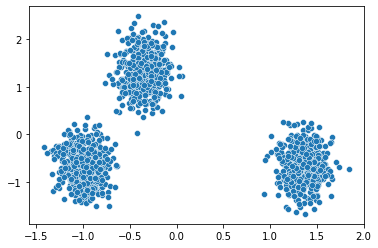

In [479]:
X, _ = make_blobs(n_samples = n)
sns.scatterplot(X[:,0],X[:,1])

# 0. Stworzenie funkcji przeszukującej paramtry i rusującej wykresy dla kazdego z modeli

Best params: clusters=6, n_init=6


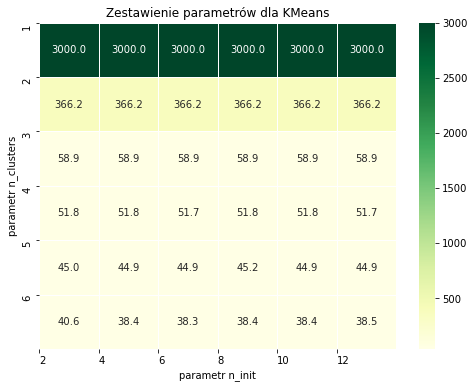

(6, 6)

In [440]:
from sklearn.cluster import KMeans
import pandas as pd

def gridsearch_kmeans(par1, par2,X):
    best_par1 = par1[0]
    best_par2 = par2[0]
    zero = KMeans(n_init=best_par1,n_clusters=best_par2).fit(X)
    score = zero.inertia_
    wyniki = [[0 for _ in range(len(par1))] for _ in range(len(par2))]
    k,s=0,0
    min_v, max_v = 0,0
    wyniki[k][s] = score
    for i in par1:
        s=0
        for j in par2:
            kmeans = KMeans(n_init=j,n_clusters=i)
            kmeans.fit(X)
            wyniki[k][s] = kmeans.inertia_
            s+=1
            if kmeans.inertia_ < score:
                score = kmeans.inertia_
                best_par1,best_par2 = i,j
        k+=1
    wyniki = pd.DataFrame(wyniki)
    print(f"Best params: clusters={best_par1}, n_init={best_par2}")
    plt.figure(figsize=(8, 6))
    min_val = wyniki.min().min()
    max_val = wyniki.max().max()
    sns.heatmap(wyniki, annot=True, fmt=".1f", linewidths=.5, vmin=min_val, vmax=max_val,cmap="YlGn")
    plt.yticks(ticks=range(len(par1)), labels=par1, rotation=90,va='top')
    plt.xticks(ticks=range(len(par2)), labels=par2, rotation=0,ha='left')
    plt.title("Zestawienie parametrów dla KMeans")
    plt.xlabel('parametr n_init')
    plt.ylabel('parametr n_clusters')
    plt.show()
    return best_par1,best_par2

n_clusters = [1, 2, 3, 4, 5, 6]
n_init = [2, 4, 6, 8, 10, 12]

gridsearch_kmeans(n_clusters, n_init,X)

In [441]:
kmeans = KMeans(n_init=12,n_clusters=6)
kmeans.fit(X)
kmeans.inertia_

38.53859883490513

Text(0.5, 1.0, 'K-Means podział z K=6')

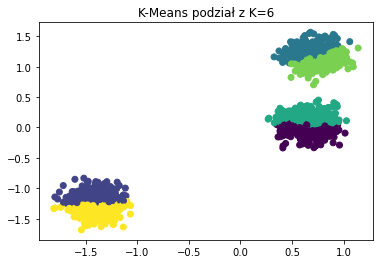

In [442]:
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.title("K-Means podział z K=6")

In [443]:
kmeans = KMeans(n_init=12,n_clusters=3)
kmeans.fit(X)
kmeans.inertia_

58.92467119399676

Text(0.5, 1.0, 'K-Means podział z K=3')

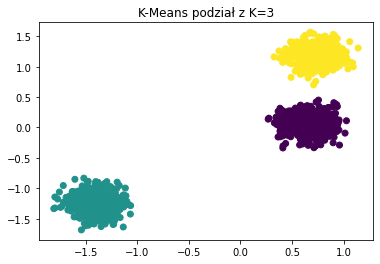

In [444]:
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.title("K-Means podział z K=3")

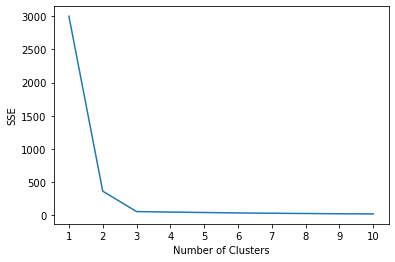

In [445]:
def plot_kmeans(X):
    sse=[]
    for k in range(1, 11):
        kmeans = KMeans(n_clusters = k, n_init=12)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    plt.plot(range(1,11),sse)
    plt.xticks(range(1, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()
plot_kmeans(X)

Best params: eps=0.2, min_samples=15


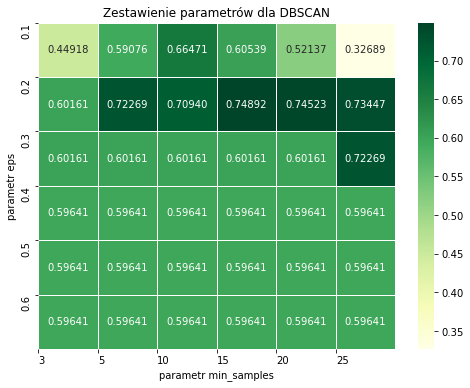

(0.2, 15)

In [480]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import pandas as pd

def gridsearch_db(par1, par2,X):
    best_par1 = par1[0]
    best_par2 = par2[0]
    labels = DBSCAN(eps=best_par1,min_samples=best_par2).fit_predict(X)
    if len(np.unique(labels)) > 1: score = silhouette_score(X,labels)
    else: score = 0
    wyniki = [[0 for _ in range(len(par1))] for _ in range(len(par2))]
    k,s=0,0
    wyniki[k][s] = score
    for i in par1:
        s=0
        for j in par2:
            db = DBSCAN(eps=i,min_samples=j)
            labels = db.fit_predict(X)
            if len(np.unique(labels)) > 1:
                wyniki[k][s] = silhouette_score(X,labels)
                s+=1
                if silhouette_score(X,labels) > score:
                    score = silhouette_score(X,labels)
                    best_par1,best_par2 = i,j
            else: wyniki[k][s] = 0
        k+=1
    wyniki = pd.DataFrame(wyniki)
    print(f"Best params: eps={best_par1}, min_samples={best_par2}")
    plt.figure(figsize=(8, 6))
    min_val = wyniki.min().min()
    max_val = wyniki.max().max()
    sns.heatmap(wyniki, annot=True, fmt=".5f", linewidths=.5, vmin=min_val, vmax=max_val, cmap="YlGn")
    plt.yticks(ticks=range(len(par2)), labels=par1, rotation=90,va='top')
    plt.xticks(ticks=range(len(par1)), labels=par2, rotation=0,ha='left')
    plt.title("Zestawienie parametrów dla DBSCAN")
    plt.xlabel('parametr min_samples')
    plt.ylabel('parametr eps')
    plt.show()
    return best_par1, best_par2

eps= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
min_samples= [3, 5, 10, 15, 20, 25]
gridsearch_db(eps, min_samples,X)

0.8165720596142599


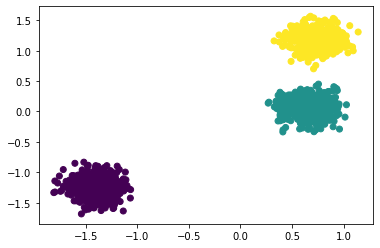

In [448]:
dbscan = DBSCAN(eps=0.2, min_samples=3)
labels = dbscan.fit_predict(X)
if len(np.unique(labels)) > 1:
    print(silhouette_score(X,labels))
plt.scatter(X[:, 0], X[:, 1], c = labels)

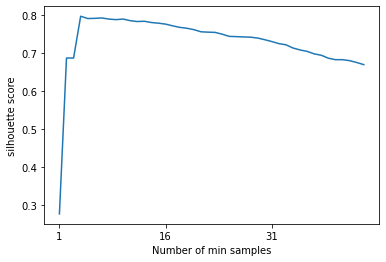

In [449]:
def plot_dbscan(X):
    end=1
    sse=[]
    for k in range(1, 45):
        db = DBSCAN(eps=0.1, min_samples=k)
        labels = db.fit_predict(X)
        if len(np.unique(labels)) > 1:
            sse.append(silhouette_score(X, labels))
            end+=1
    plt.plot(range(1,end),sse)
    plt.xticks(range(1, end, int(end/3)))
    plt.xlabel("Number of min samples")
    plt.ylabel("silhouette score")
    plt.show()
plot_dbscan(X)

0.8057231601698909


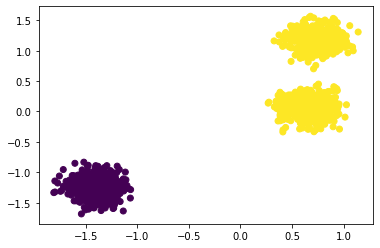

In [450]:
dbscan = DBSCAN(eps=0.3, min_samples=3)
labels = dbscan.fit_predict(X)
print(silhouette_score(X,labels))
plt.scatter(X[:, 0], X[:, 1], c = labels)

In [266]:
from sklearn.cluster import AgglomerativeClustering

In [451]:
hier = AgglomerativeClustering(n_clusters=3, metric='manhattan', linkage='average')
labels = hier.fit_predict(X)

Text(0.5, 1.0, 'Hierarchy podział z n=3')

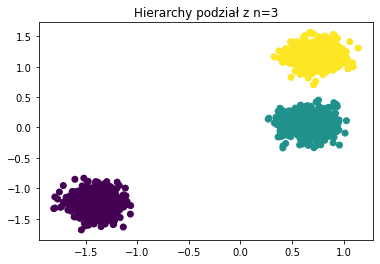

In [452]:
plt.scatter(X[:, 0], X[:, 1], c = labels)
plt.title("Hierarchy podział z n=3")

Best params: eps=3, metrics=euclidean


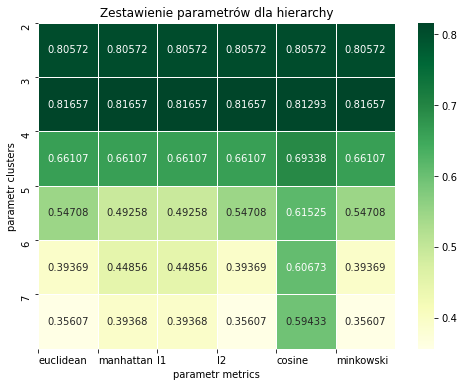

(3, 'euclidean')

In [453]:
def gridsearch_h(par1, par2,X):
    best_par1 = par1[0]
    best_par2 = par2[0]
    labels = AgglomerativeClustering(n_clusters=best_par1,linkage='average',metric=best_par2).fit_predict(X)
    if len(np.unique(labels)) > 1: score = silhouette_score(X,labels)
    else: score = 0
    wyniki = [[0 for _ in range(len(par1))] for _ in range(len(par2))]
    k,s=0,0
    wyniki[k][s] = score
    for i in par1:
        s=0
        for j in par2:
            db = AgglomerativeClustering(linkage='average',n_clusters=i,metric=j)
            labels = db.fit_predict(X)
            if len(np.unique(labels)) > 1:
                wyniki[k][s] = silhouette_score(X,labels)
                s+=1
                if silhouette_score(X,labels) > score:
                    score = silhouette_score(X,labels)
                    best_par1,best_par2 = i,j
            else: wyniki[k][s]=0
        k+=1
    wyniki = pd.DataFrame(wyniki)
    print(f"Best params: eps={best_par1}, metrics={best_par2}")
    plt.figure(figsize=(8, 6))
    min_val = wyniki.min().min()
    max_val = wyniki.max().max()
    sns.heatmap(wyniki, annot=True,fmt=".5f", linewidths=.5,vmin=min_val, vmax=max_val,cmap="YlGn")
    plt.yticks(ticks=range(len(par2)), labels=par1, rotation=90,va='top')
    plt.xticks(ticks=range(len(par1)), labels=par2, rotation=0,ha='left')
    plt.title("Zestawienie parametrów dla hierarchy")
    plt.xlabel('parametr metrics')
    plt.ylabel('parametr clusters')
    plt.show()
    return best_par1, best_par2

clusters= [2,3,4,5,6,7]
metrics= ['euclidean','manhattan','l1','l2','cosine','minkowski']
gridsearch_h(clusters, metrics,X)

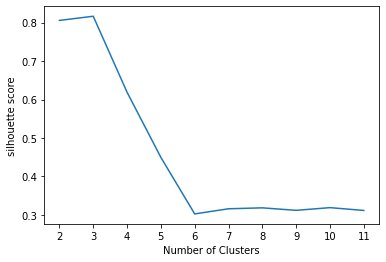

In [454]:
def plot_hierarchy(X):
    end =2
    sse=[]
    for k in range(2, 12):
        hierarchy = AgglomerativeClustering(n_clusters = k)
        labels = hierarchy.fit_predict(X)
        if len(np.unique(labels)) > 1:
            sse.append(silhouette_score(X, labels))
            end+=1
    plt.plot(range(2,end),sse)
    plt.xticks(range(2, end))
    plt.xlabel("Number of Clusters")
    plt.ylabel("silhouette score")
    plt.show()
plot_hierarchy(X)

## 2 Funkcje automatycznie dobierające parametry i rysujące wykresy i dokonujące clusteringu

## 2.1 kmeans

In [481]:
def do_kmeans(X):
    par1 = [1, 2, 3, 4, 5, 6]
    par2 = [2, 4, 6, 8, 10, 12]
    best1,best2 = gridsearch_kmeans(par1, par2,X)
    kmeans = KMeans(n_init=best2,n_clusters=best1)
    kmeans.fit(X)
    plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
    plt.title(f"K-Means podział z K={best1}, n_init={best2}")
    plt.show()
    plot_kmeans(X)

def do_dbscan(X):
    par1= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
    par2= [2, 5, 10, 15, 20, 25]
    best1,best2 = gridsearch_db(par1, par2,X)
    db = DBSCAN(eps=best1,min_samples=best2)
    labels = db.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c = labels)
    plt.title(f"DBSCAN podział z eps={best1}, min_samples={best2}")
    plt.show()
    plot_dbscan(X)

def do_hierarchy(X):
    par1= [2,3,4,5,6,7]
    par2= ['euclidean','manhattan','l1','l2','cosine','minkowski']   
    best1,best2 = gridsearch_h(par1, par2,X)
    if best2 != 'euclidean': link = 'average'
    else: link = 'ward'
    hier = AgglomerativeClustering(metric=best2,n_clusters=best1,linkage=link)
    labels = hier.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c = labels)
    plt.title(f"Hierarchy podział z n={best1}, metric={best2}")
    plt.show()
    plot_hierarchy(X)

# 3. Test dla zbioru pierwszego

Best params: clusters=6, n_init=10


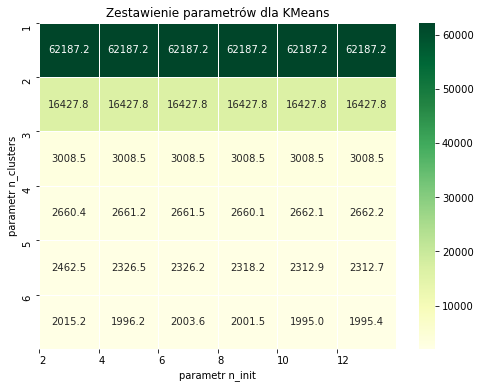

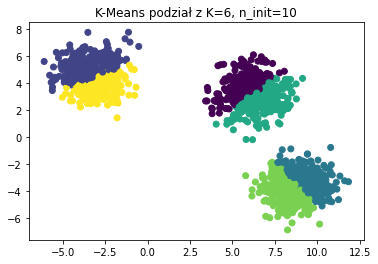

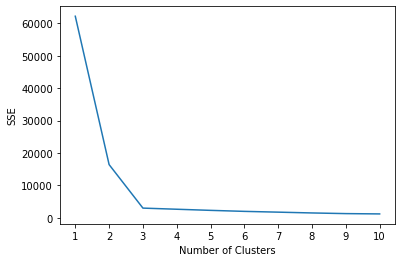

In [472]:
X, _ = make_blobs(n_samples = n)
do_kmeans(X)

Best params: eps=0.6, min_samples=5


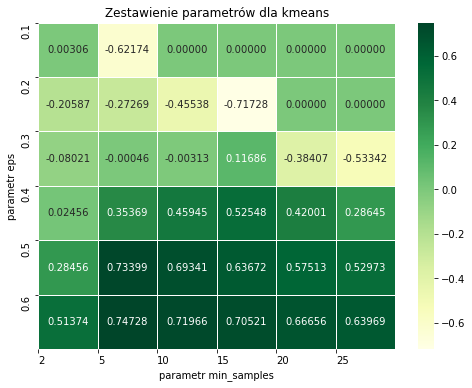

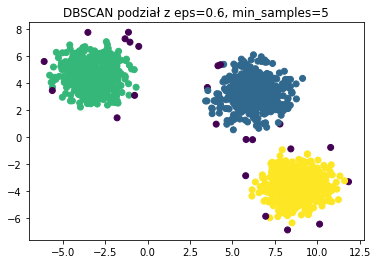

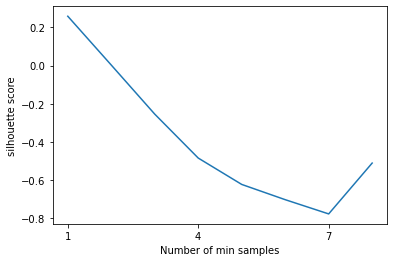

In [473]:
do_dbscan(X)

Best params: eps=3, metrics=euclidean


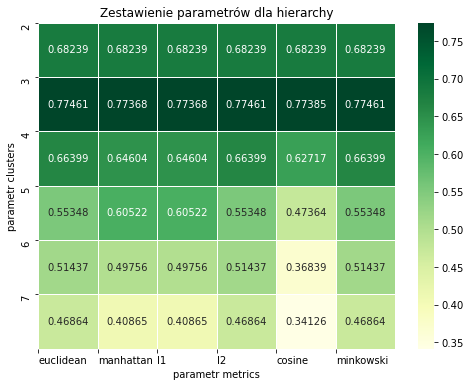

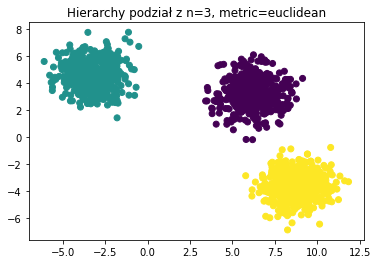

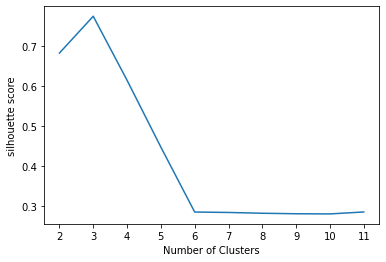

In [474]:
do_hierarchy(X)

# 3.2 Testy dla zbioru 2

Best params: clusters=6, n_init=8


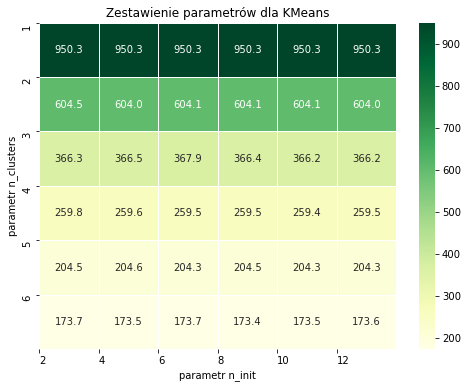

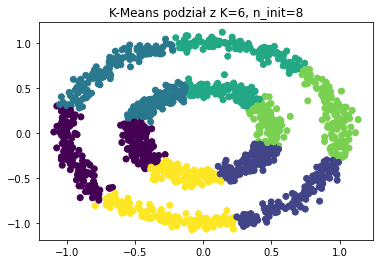

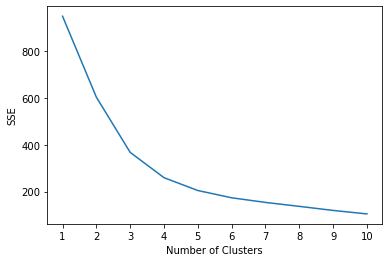

In [482]:
noise = 0.05
X, y = make_circles(n_samples = n, factor = 0.5, noise = noise)
do_kmeans(X)

Best params: eps=0.2, min_samples=2


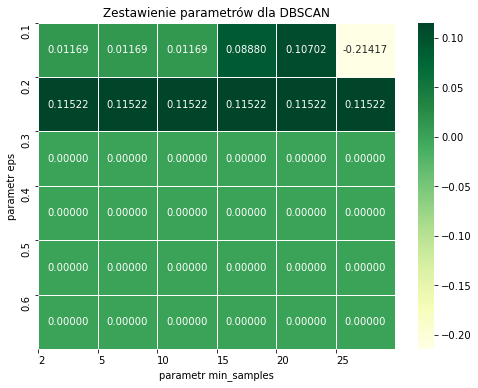

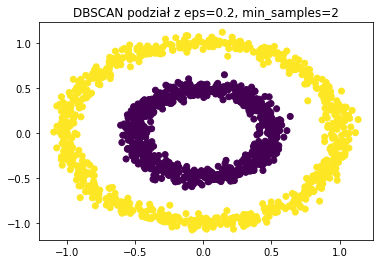

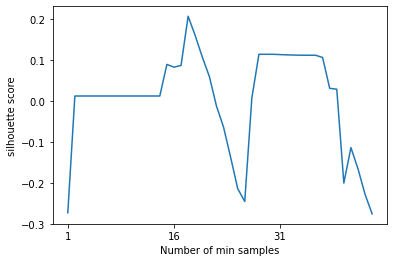

In [485]:
do_dbscan(X)

Best params: eps=3, metrics=manhattan


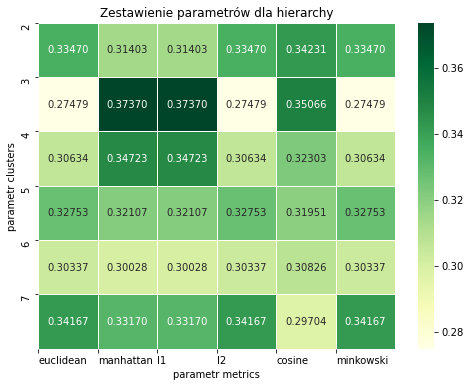

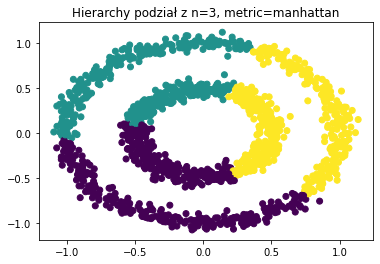

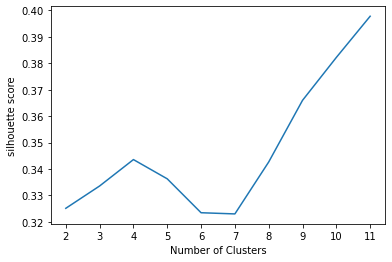

In [484]:
do_hierarchy(X)

# 3.2 Testy dla zbioru 3

In [486]:
noise = 0.05
X, y = make_moons(n_samples = n, noise = noise)

Best params: clusters=6, n_init=4


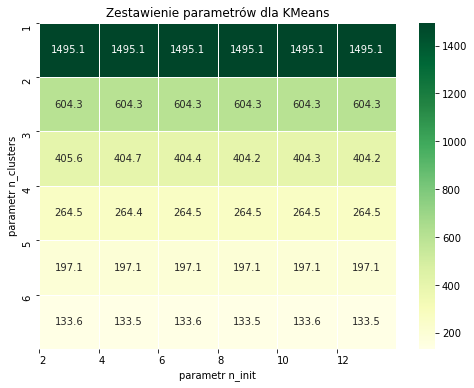

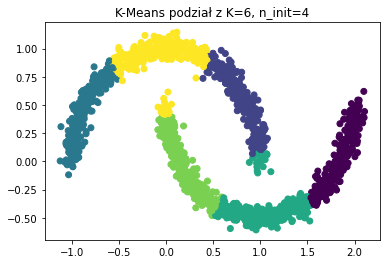

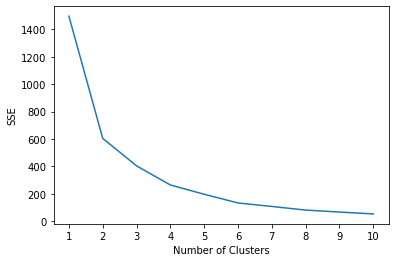

In [487]:
do_kmeans(X)

Best params: eps=0.1, min_samples=2


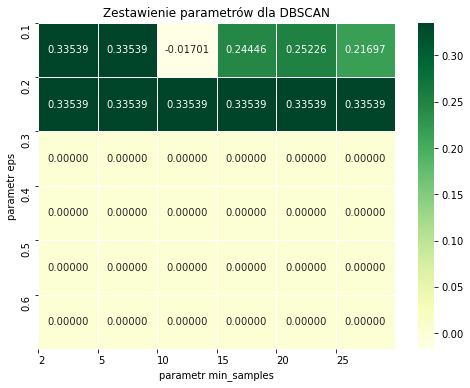

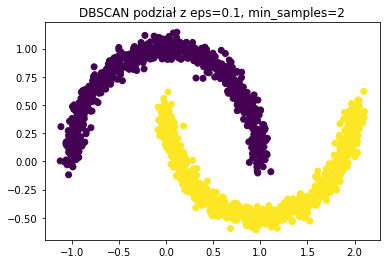

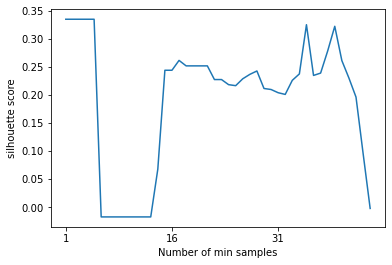

In [488]:
do_dbscan(X)

Best params: eps=7, metrics=manhattan


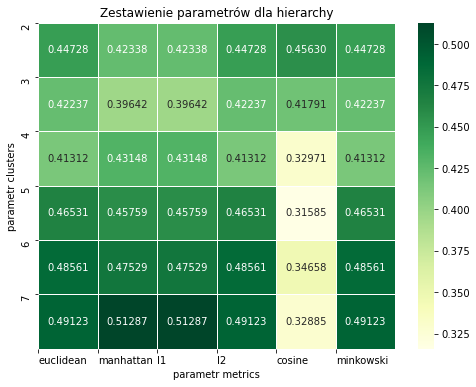

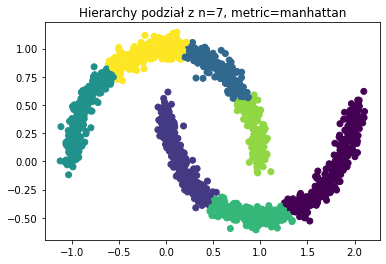

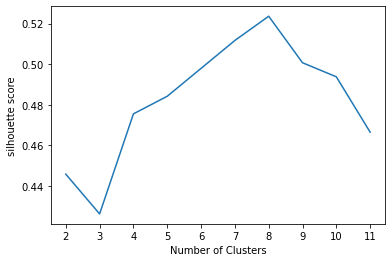

In [489]:
do_hierarchy(X)

# 3.2 Testy dla zbioru 4

In [466]:
X = np.random.rand(n, 2)

Best params: clusters=6, n_init=10


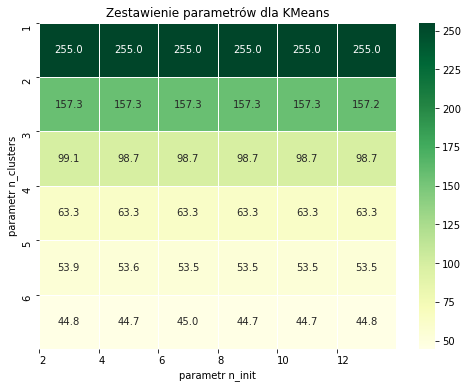

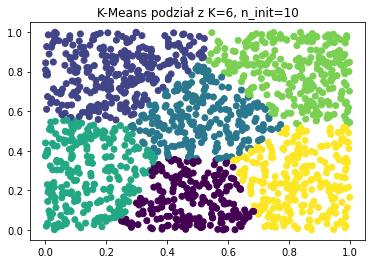

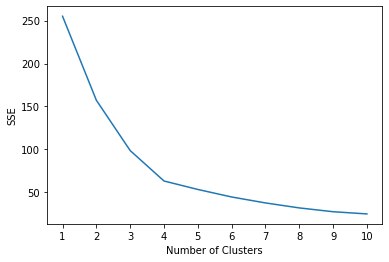

In [467]:

do_kmeans(X)

Best params: eps=0.1, min_samples=2


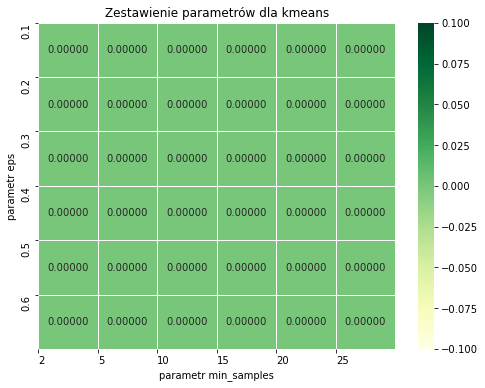

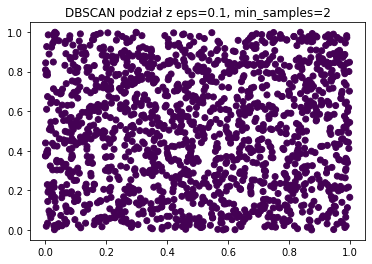

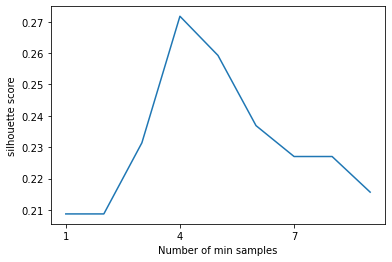

In [468]:
do_dbscan(X)

Best params: eps=3, metrics=euclidean


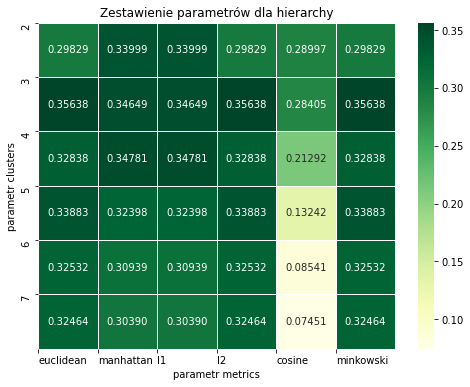

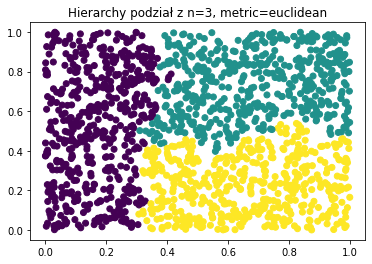

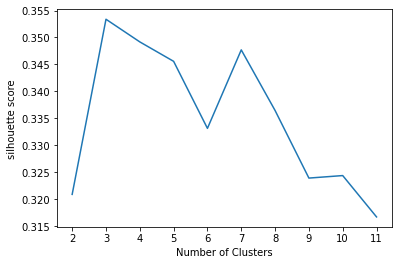

In [469]:
do_hierarchy(X)

/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'random')

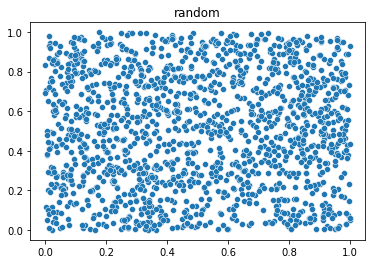

In [560]:
X = np.random.rand(n, 2)
sns.scatterplot(X[:,0],X[:,1])
plt.title("random")

## 4  badanie wpływu szumu na dane

Best params: eps=3, metrics=cosine


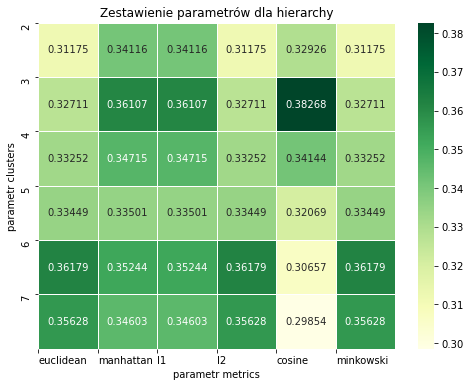

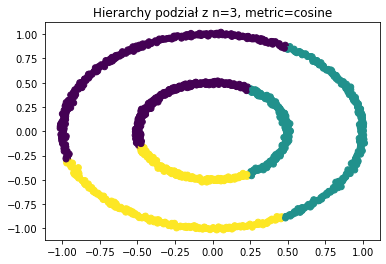

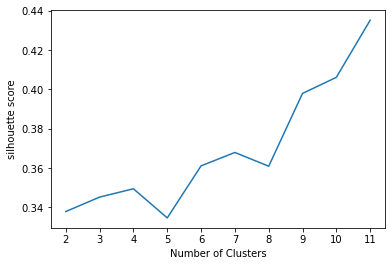

Best params: eps=3, metrics=euclidean


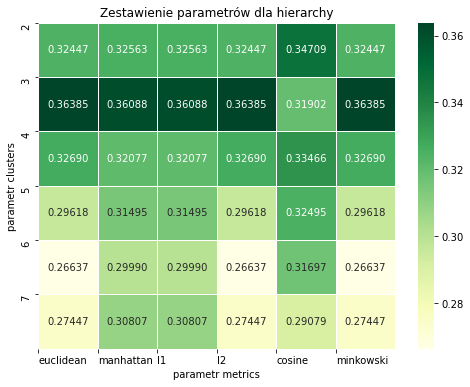

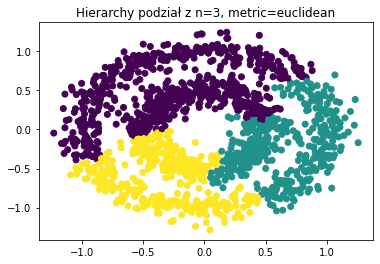

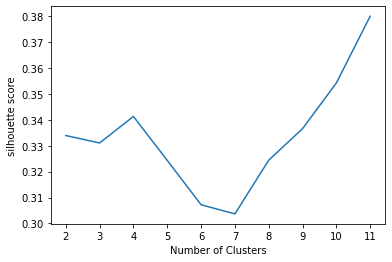

Best params: eps=2, metrics=manhattan


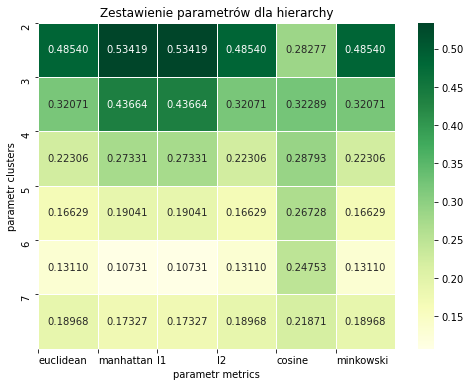

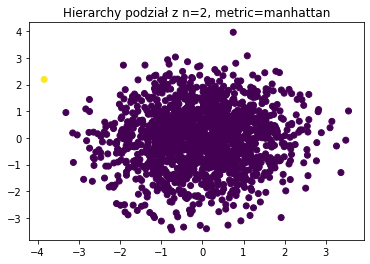

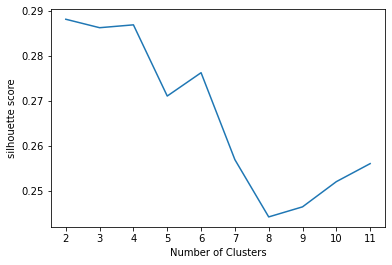

In [578]:
for i in ([0.01,0.1,1]):
    X, _ = make_circles(n_samples = n,factor=0.5, noise = i)
    do_hierarchy(X)

# 5. Suma odległości

eps=0.3, Liczba klastrów=8, Całkowita suma odległości=2653.3977742010857


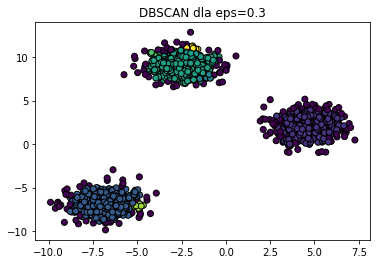

eps=0.5, Liczba klastrów=5, Całkowita suma odległości=2063.8734375519566


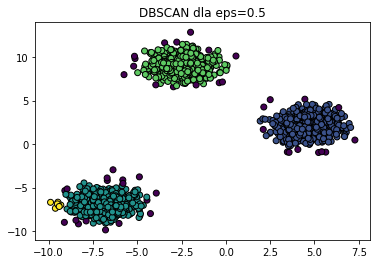

eps=0.7, Liczba klastrów=4, Całkowita suma odległości=1937.8472996668147


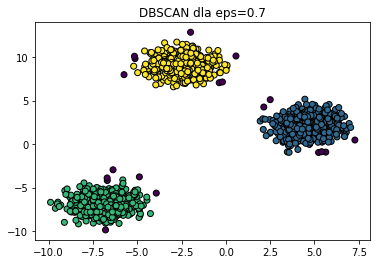

In [600]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=1500, random_state=42)

eps_values = [0.3, 0.5, 0.7]

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X)
    
    unique_labels = np.unique(labels)
    
    if len(unique_labels) > 1: 
        total_distance = 0
        
        for label in unique_labels:
            cluster_points = X[labels == label]
            cluster_center = np.mean(cluster_points, axis=0)
            distances = np.linalg.norm(cluster_points - cluster_center, axis=1)
            total_distance += np.sum(distances)
        
        print(f"eps={eps}, Liczba klastrów={len(unique_labels)}, Całkowita suma odległości={total_distance}")

        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k')
        plt.title(f'DBSCAN dla eps={eps}')
        plt.show()


Text(0, 0.5, 'całkowita suma odległości')

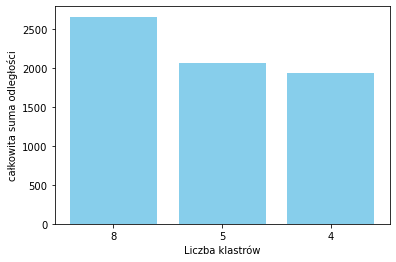

In [584]:
plt.bar(["8","5","4"], [2653.3977742010857,2063.8734375519566,1937.8472996668147], color='skyblue')
plt.xlabel('Liczba klastrów')
plt.ylabel('całkowita suma odległości')